In [1]:
import plotly.offline as pyo
pyo.init_notebook_mode()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn import preprocessing
import random
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
!pip install visualkeras

2022-01-25 14:25:57.749514: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


     |████████████████████████████████| 795 kB 4.9 MB/s eta 0:00:01


In [2]:
base = '../input/brain-tumor/MAR 2020 MRI_AXIAL-20220125T052758Z-001/MAR 2020 MRI_AXIAL-20220125T052758Z-001/MAR 2020 MRI_AXIAL/AD/AD_AXIAL_MRI/AD_AXIAL_01'
lt = os.listdir(base)

In [3]:
!pip install pydicom

In [4]:
import pydicom as dicom
import os
import numpy
from matplotlib import pyplot, cm

In [5]:
w,h = 128,128
arr = []
rl=[]
import imageio
from tqdm import tqdm
# loop through all the DICOM files
for i in tqdm(range(len(lt))):
    # read the file
    ds = imageio.imread(base+'/'+lt[i])
    img = np.array(ds)
    if img.shape == (128,128):
        continue
    img = cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)
    img = img.reshape(w,h,1)
    arr.append(img)
    rl.append(base+'/'+lt[i])

100%|██████████| 88/88 [00:00<00:00, 129.34it/s]


In [6]:
X1 = np.array(arr)
X1.shape

(43, 128, 128, 1)

In [7]:
def see_sample(j):
    ds = imageio.imread(rl[j])
    img = np.array(ds)
    plt.subplots(1,2,figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('SHAPE from image: '+str(img.shape))
    plt.subplot(1, 2, 2)
    plt.imshow(X1[j])
    plt.title('SHAPE from X : '+str( X1[j].shape))
    #plt.suptitle("For Figure Number "+str(j),fontsize=16)
    plt.show()

23


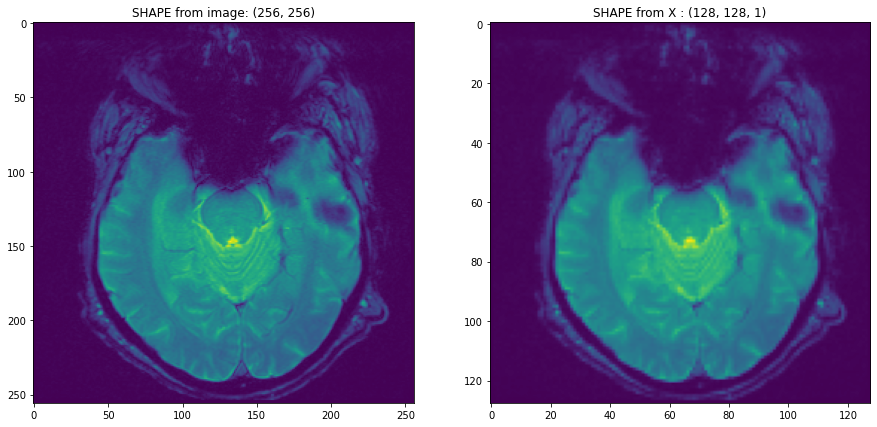

13


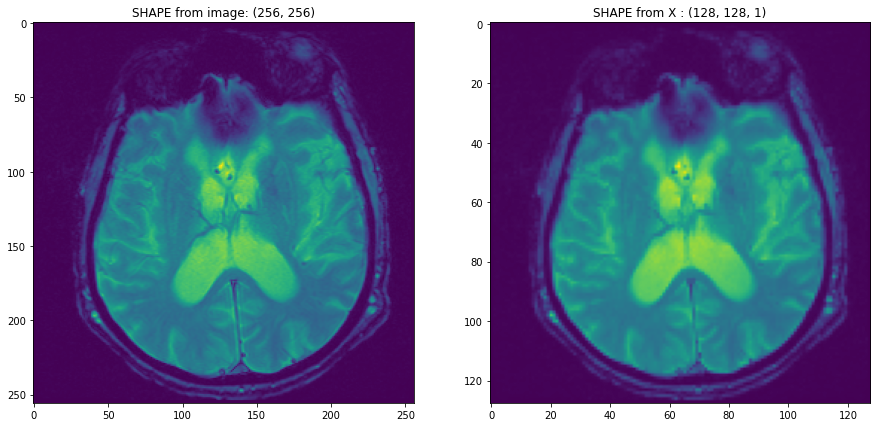

27


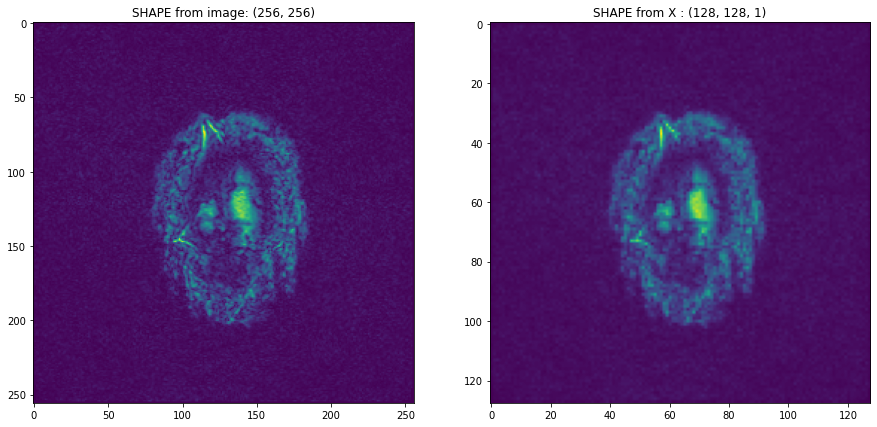

0


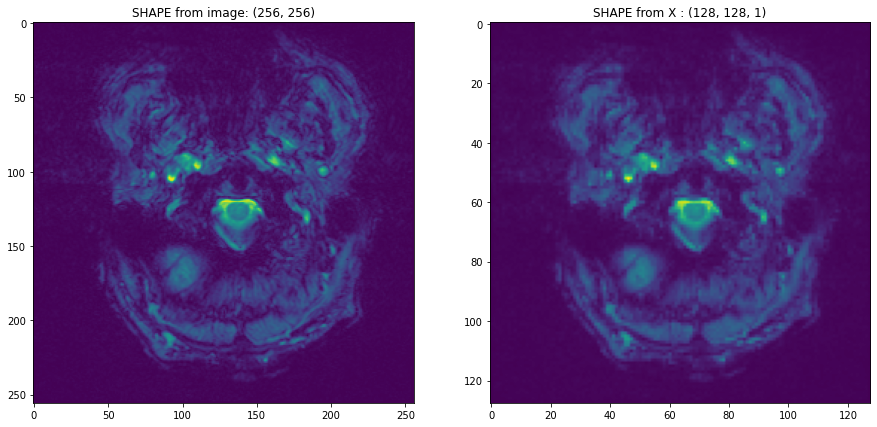

2


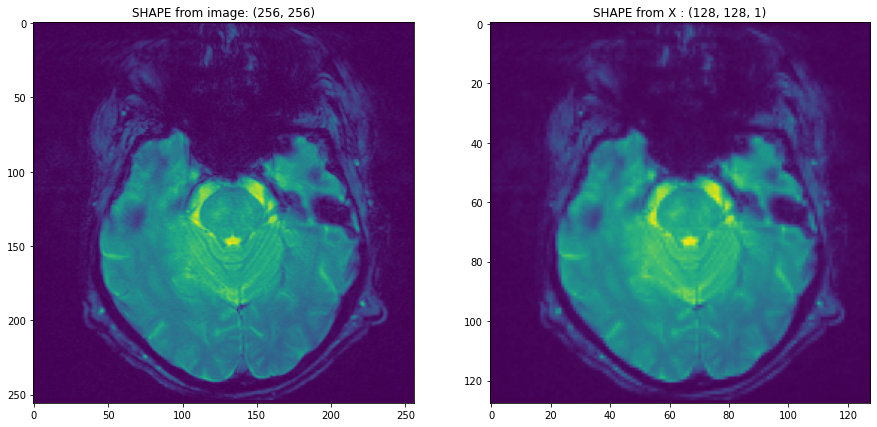

13


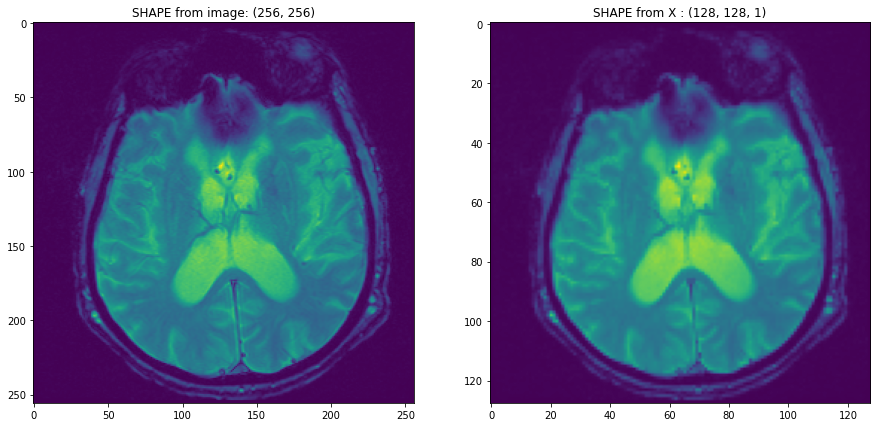

11


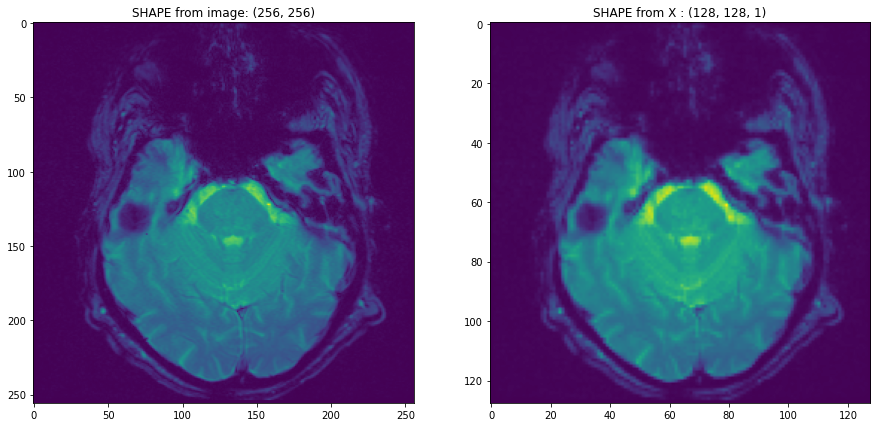

15


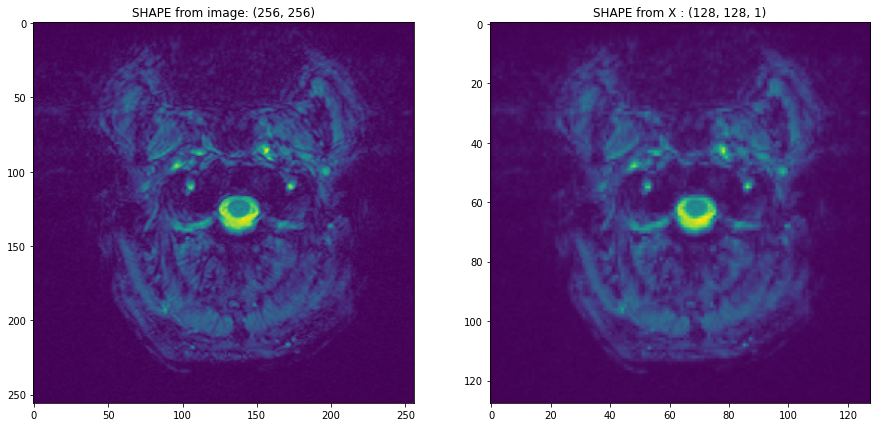

41


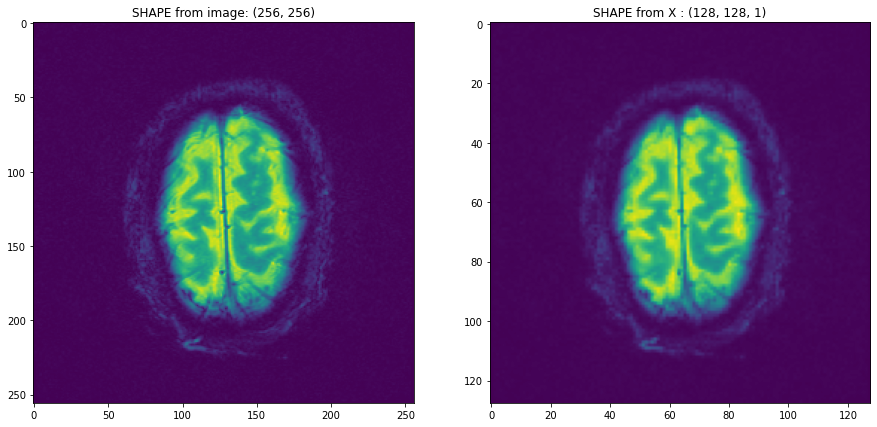

6


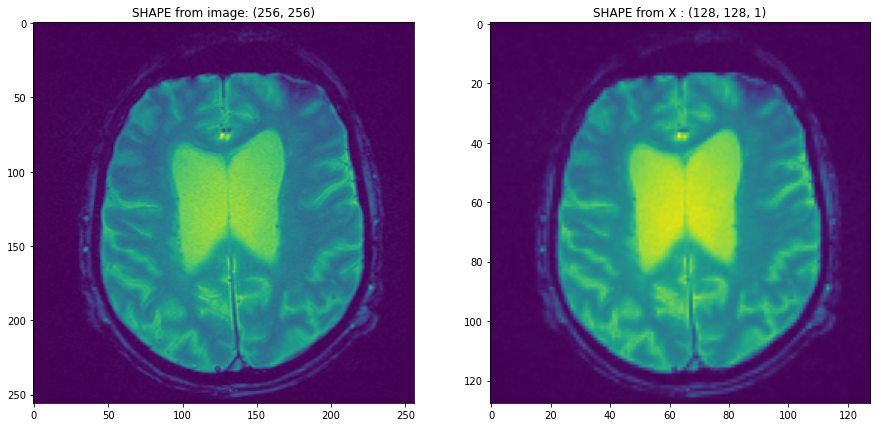

In [8]:
import random
for i in range(10):
    num = random.randint(0,X1.shape[0]-1)
    print(num)
    see_sample(num)

In [9]:
def create_df():
    main = '../input/brain-tumor/MAR 2020 MRI_AXIAL-20220125T052758Z-001/MAR 2020 MRI_AXIAL-20220125T052758Z-001/MAR 2020 MRI_AXIAL/'
    df = pd.DataFrame()
    for Class in os.listdir(main):
        for axial in os.listdir(main+'/'+Class):
            for patient in os.listdir(main+'/'+Class+'/'+axial):
                for image in os.listdir(main+'/'+Class+'/'+axial+'/'+patient):
                    df = df.append({
                        'Category':Class,
                        'type':axial,
                        'patient':patient,
                        'location':main+'/'+Class+'/'+axial+'/'+patient+'/'+image,
                    },ignore_index = True)
    return df

In [10]:
df = create_df()
df.shape

(11219, 4)

In [11]:
df.columns

Index(['Category', 'location', 'patient', 'type'], dtype='object')

In [12]:
df.head()

Category                                           location       patient  \
0      MCI  ../input/brain-tumor/MAR 2020 MRI_AXIAL-202201...  MCI_AXIAL_37   
1      MCI  ../input/brain-tumor/MAR 2020 MRI_AXIAL-202201...  MCI_AXIAL_37   
2      MCI  ../input/brain-tumor/MAR 2020 MRI_AXIAL-202201...  MCI_AXIAL_37   
3      MCI  ../input/brain-tumor/MAR 2020 MRI_AXIAL-202201...  MCI_AXIAL_37   
4      MCI  ../input/brain-tumor/MAR 2020 MRI_AXIAL-202201...  MCI_AXIAL_37   

            type  
0  MCI_AXIAL_MRI  
1  MCI_AXIAL_MRI  
2  MCI_AXIAL_MRI  
3  MCI_AXIAL_MRI  
4  MCI_AXIAL_MRI

In [13]:
df.groupby(['Category']).count()

location  patient  type
Category                         
AD            3720     3720  3720
CN            4401     4401  4401
MCI           3098     3098  3098

In [14]:
df = df.groupby('Category').apply(lambda x: x.sample(3000)).reset_index(drop=True)
df.groupby(['Category']).count()

location  patient  type
Category                         
AD            3000     3000  3000
CN            3000     3000  3000
MCI           3000     3000  3000

In [15]:
w , h= 128,128
final_class = len(np.unique(df['Category']))
w,h ,final_class

(128, 128, 3)

In [16]:
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
left = []
y = []
for ind in tqdm(df.index):
    ds = imageio.imread(df.loc[ind,'location'])
    img = np.array(ds)
    if img.shape == (128,128):
        continue
    img = cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)
    img = img.reshape(w,h,1)
    left.append(img)
    y.append(df.loc[ind,'Category'])
X = np.array(left)
y = np.array(y)
y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y)
# print(enc.categories_)
y = enc.transform(y).toarray()
print('Data   :   '+str(X.shape))
print('Output :   '+str(y.shape))

100%|██████████| 9000/9000 [01:08<00:00, 131.23it/s]


Data   :   (7145, 128, 128, 1)
Output :   (7145, 3)


In [17]:
np.save('X.npy',X)
np.save('Y.npy',y)

In [18]:
X = np.load('X.npy')
Y=np.load('Y.npy')
X.shape,Y.shape

((7145, 128, 128, 1), (7145, 3))

In [19]:
from IPython.display import FileLink
FileLink(r'X.npy')

/kaggle/working/X.npy

In [20]:
from IPython.display import FileLink
FileLink(r'Y.npy')

/kaggle/working/Y.npy

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))

Train data    :(5716, 128, 128, 1)
Test data     :(1429, 128, 128, 1)
Train Output  :(5716, 3)
Test Output   :(1429, 3)


In [22]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten , Conv1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import UpSampling2D
def model_b():
    inp1 = Input(shape=(X.shape[1],X.shape[2],1,))
    new_input = Input(shape=(X.shape[1],X.shape[2], 3))
    conv1 = Conv2D(3, kernel_size=3, padding ='same', activation='relu')(inp1)
    i1 = tf.keras.applications.DenseNet169(weights='imagenet', 
                                include_top=False, 
                                input_shape=None,
                         pooling=None,
                    )(conv1)
    i1 = tf.keras.layers.Flatten()(i1)
    class1 = Dense(1024, activation='relu')(i1)
    output = Dense(final_class, activation='sigmoid')(class1)
    model = Model(inputs=inp1, outputs=output)
    return model
md = model_b()

2022-01-25 14:28:05.641366: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-25 14:28:05.645043: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-25 14:28:05.695721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-25 14:28:05.696752: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-01-25 14:28:05.696852: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-01-25 14:28:05.772999: I tensorflow/stream_executor/platform/def

51879936/51877672 [==============================] - 0s 0us/step


# Train Test Validation

In [23]:
from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [24]:
X_train.shape[0],X_test.shape[0],X_valid.shape[0]

(4287, 1429, 1429)

In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
def LR_verify():
        model = model_b()
        METRICS = [
               'accuracy',tf.keras.metrics.Recall(name = 'recall'),
                tf.keras.metrics.Precision(name = 'precision')
        ]  
        model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=METRICS
            )
        history = model.fit(X_train, y_train, epochs=20,verbose=1,shuffle = True,validation_data=(X_valid,y_valid))
        return model,history
model,history= LR_verify()

Epoch 1/20
224/224 [==============================] - 103s 458ms/step - loss: 0.8774 - accuracy: 0.7238 - recall: 0.8427 - precision: 0.5964 - val_loss: 0.3928 - val_accuracy: 0.8132 - val_recall: 0.9118 - val_precision: 0.7024
Epoch 2/20
224/224 [==============================] - 102s 454ms/step - loss: 0.3202 - accuracy: 0.8615 - recall: 0.9429 - precision: 0.6951 - val_loss: 0.2372 - val_accuracy: 0.8971 - val_recall: 0.9706 - val_precision: 0.7194
Epoch 3/20
224/224 [==============================] - 101s 453ms/step - loss: 0.2239 - accuracy: 0.9011 - recall: 0.9618 - precision: 0.7457 - val_loss: 0.2231 - val_accuracy: 0.9160 - val_recall: 0.9755 - val_precision: 0.6517
Epoch 4/20
224/224 [==============================] - 102s 454ms/step - loss: 0.1730 - accuracy: 0.9319 - recall: 0.9759 - precision: 0.7650 - val_loss: 0.1478 - val_accuracy: 0.9349 - val_recall: 0.9769 - val_precision: 0.8135
Epoch 5/20
224/224 [==============================] - 102s 456ms/step - loss: 0.1542 - a

In [31]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
name ='BT_DENSE169'
with open(name+".json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(name+".h5")
import pandas as pd
json_file = open('./'+name+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('./'+name+'.h5')
print("Loaded model from disk")
hist_df = pd.DataFrame(history.history) 
hist_df.to_csv(name+'.csv',index = False)
hist_df.tail()

Loaded model from disk


loss  accuracy    recall  precision  val_loss  val_accuracy  \
15  0.038965  0.985164  0.994682   0.849510  0.271451      0.935619   
16  0.049072  0.980966  0.994962   0.799213  0.201005      0.944717   
17  0.041594  0.985444  0.993842   0.795452  0.086543      0.960112   
18  0.068800  0.967250  0.993282   0.803373  0.037713      0.983905   
19  0.039389  0.985444  0.994542   0.880436  0.091113      0.965011   

    val_recall  val_precision  
15    0.979706       0.791408  
16    0.984605       0.667457  
17    0.983205       0.816386  
18    0.993002       0.862614  
19    0.980406       0.853748

# Results

## Train

In [32]:
METRICS = [
                'accuracy',
                tf.keras.metrics.BinaryAccuracy(),
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall(),
                tf.keras.metrics.FalseNegatives(),
                tf.keras.metrics.FalsePositives(),
                tf.keras.metrics.TrueNegatives(),
                tf.keras.metrics.TruePositives(),
                tf.keras.metrics.AUC()
    
        ]  
loaded_model.compile(
                optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=METRICS
            )
score = loaded_model.evaluate(X_train,y_train, verbose=0)

In [33]:
for i in range(len(score)):
    print(loaded_model.metrics_names[i]+" : "+str(score[i]))

loss : 0.0709400400519371
accuracy : 0.9699090123176575
binary_accuracy : 0.9396623969078064
precision : 0.854002833366394
recall : 0.9878702759742737
false_negatives : 52.0
false_positives : 724.0
true_negatives : 7850.0
true_positives : 4235.0
auc : 0.9967674612998962


## Test

In [34]:
score = loaded_model.evaluate(X_test, y_test, verbose=0)

In [35]:
for i in range(len(score)):
    print(loaded_model.metrics_names[i]+" : "+str(score[i]))

loss : 0.06790562719106674
accuracy : 0.9755073189735413
binary_accuracy : 0.9444835782051086
precision : 0.8624467253684998
recall : 0.9916025400161743
false_negatives : 12.0
false_positives : 226.0
true_negatives : 2632.0
true_positives : 1417.0
auc : 0.9970633387565613


# Validation

In [36]:
score = loaded_model.evaluate(X_valid, y_valid, verbose=0)

In [37]:
for i in range(len(score)):
    print(loaded_model.metrics_names[i]+" : "+str(score[i]))

loss : 0.09111298620700836
accuracy : 0.9650105237960815
binary_accuracy : 0.9374854564666748
precision : 0.8537477254867554
recall : 0.980405867099762
false_negatives : 28.0
false_positives : 240.0
true_negatives : 2618.0
true_positives : 1401.0
auc : 0.9958162307739258


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
yhat = loaded_model.predict(X_test)
yhat = enc.inverse_transform(yhat)
report = classification_report(enc.inverse_transform(y_test), yhat,output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score      support
AD             0.973529  0.940341  0.956647   352.000000
CN             0.998148  0.976449  0.987179   552.000000
MCI            0.954463  0.998095  0.975791   525.000000
accuracy       0.975507  0.975507  0.975507     0.975507
macro avg      0.975380  0.971628  0.973206  1429.000000
weighted avg   0.976034  0.975507  0.975475  1429.000000

In [39]:
df.to_csv('Class_Wise_Accuracy.csv')